In [2]:
!pip install pdfminer.six

     |████████████████████████████████| 5.6MB 4.1MB/s eta 0:00:01
     |████████████████████████████████| 2.8MB 25.5MB/s eta 0:00:01
  Found existing installation: cryptography 2.7
    Uninstalling cryptography-2.7:
      Successfully uninstalled cryptography-2.7


In [4]:
!pip install typing-extensions

/Users/asmaghorbel/opt/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


In [1]:
import argparse
import os
from glob import glob
from pdfminer.high_level import extract_text
import pandas as pd
import re

In [2]:



#rawDataPath = r'/home/hienpham/Bureau/Job-Description-Understanding/raw_data/'
rawDataPath = '/Users/asmaghorbel/Desktop/ML/classification/'

repos = glob(os.path.join(rawDataPath, '*'))
df_class=pd.DataFrame([]) 
for rep in repos:
    pdfFiles = glob(os.path.join(rep, '*.pdf'))
    data=[]
    df=pd.DataFrame([]) 
    for file in pdfFiles:
        text = extract_text(file)
        data.append(text)
    df['email']=data
    df['label']=rep.replace(rawDataPath, '')
    df_class=pd.concat([df_class,df], axis=0,ignore_index=True)
   

df_class.to_csv('/Users/asmaghorbel/Desktop/ML/emails_class.csv')

In [87]:
df_class.groupby(by='label').count()

,email
label,
alert,26
availability,4
conversation,1
description,36
feedback,1
linkedin,2
subscription,1


In [88]:
df_class.shape

(71, 2)

In [7]:
df_class

,Unnamed: 0,email,label
0,0,Subject: New match: Data Engineer at Inspire\n...,alert
1,1,Subject: Eurofins USA BioPharma Services is hi...,alert
2,2,"Subject: Samsung Semiconductor, Inc. is hiring...",alert
3,3,Subject: Recruiting From Scratch is hiring for...,alert
4,4,Subject: Samsara is hiring for Computer Vision...,alert
...,...,...,...
66,66,Subject: Hi Assan- Hiring Data Scientist - Ful...,availability
67,67,Subject: Open Position- Closing 4/21\nFrom: Mo...,availability
68,68,Subject: Your application for Lead Data Scient...,linkedin
69,69,Subject: Your application for Data Scientist w...,linkedin


In [8]:
b=df_class['email'].iloc[0]
b

'Subject: New match: Data Engineer at Inspire\nFrom: Hello from Otta <hello@otta.com>\nTo: Assan Sanogo <assansanogo@gmail.com>\nDate Sent: Monday, April 18, 2022 9:26:26 AM GMT-07:00\nDate Received: Monday, April 18, 2022 9:26:27 AM GMT-07:00\n\nThere are new jobs matching your\npreferences, Assan!\n\nInspire\nLeading a clean energy movement\n\nData Engineer \nRemote (within the US)\n\nZocdoc\n\nAPI connecting patients to doctors\n\nClient Reporting & Analytics Associate \n\nRemote (within the US)\n\nGOAT\n\nMarketplace for authentic streetwear\n\nJunior Reporting Analyst \n\nRemote (within the US)\n\nSee all top matches on Otta\n\nReceive these notifications:\n\nNever\n\nWeekly\n\nDaily\n\nManage my preferences\n\nOtta is a trading name of Otta Technology Ltd.\n\nCannon Place, 78 Cannon Street, London, United Kingdom, EC4N 6AF\n\nClick here to manage your unsubscribe preferences, or click here to unsubscribe.\n\nExported using Save Emails to PDF by cloudHQ\n\n1/1\x0c'

## Extract Subject,From, To, Date, Body

In [3]:
df_class=pd.read_csv('/Users/asmaghorbel/Desktop/ML/emails_class.csv')

In [4]:
def email_attributes(raw_email):
    lines = raw_email.split('\n')
    email = {}
    message = ''
    keys_to_extract_p1 = ['Subject','Date Sent','Date Received']
    keys_to_extract_p2=['From','To']
    for line in lines:
        is_key=False
        for key in keys_to_extract_p1:
            if (key+':') in line:
                is_key=True
                val = line.replace(key+':',"",1)
                email[key] = val
        for key in keys_to_extract_p2: 
            if (key+':') in line:
                is_key=True
                val = line.replace(key+':',"",1)
                if re.search('<(.*)>', val)==None:
                    email[key]=val
                else:    
                    email[key] = re.search('<(.*)>', val).group(1)
        if not is_key:
            message +=line+'\n'
            
    email['Body'] = message
    
    return email

In [5]:
emails=pd.concat([df_class, df_class.email.apply(email_attributes).apply(pd.Series)], axis=1)

In [6]:
emails

,Unnamed: 0,email,label,Subject,From,To,Date Sent,Date Received,Body
0,0,Subject: New match: Data Engineer at Inspire\n...,alert,New match: Data Engineer at Inspire,hello@otta.com,assansanogo@gmail.com,"Monday, April 18, 2022 9:26:26 AM GMT-07:00","Monday, April 18, 2022 9:26:27 AM GMT-07:00",\nThere are new jobs matching your\npreference...
1,1,Subject: Eurofins USA BioPharma Services is hi...,alert,Eurofins USA BioPharma Services is hiring for...,alert@indeed.com,assansanogo@gmail.com,"Tuesday, April 19, 2022 9:39:52 PM GMT-07:00","Tuesday, April 19, 2022 9:39:53 PM GMT-07:00","engineer jobs in San Diego, CA.\n\n12 new mach..."
2,2,"Subject: Samsung Semiconductor, Inc. is hiring...",alert,"Samsung Semiconductor, Inc. is hiring for DSA...",alert@indeed.com,assansanogo@gmail.com,"Monday, April 18, 2022 2:35:24 AM GMT-07:00","Monday, April 18, 2022 2:35:24 AM GMT-07:00",Engineer / Scientist. 15 more machine learning...
3,3,Subject: Recruiting From Scratch is hiring for...,alert,Recruiting From Scratch is hiring for Data En...,alert@indeed.com,assansanogo@gmail.com,"Wednesday, April 20, 2022 6:37:13 AM GMT-07:00","Wednesday, April 20, 2022 6:37:13 AM GMT-07:00","engineer jobs in Long Beach, CA.\n\n17 new mac..."
4,4,Subject: Samsara is hiring for Computer Vision...,alert,Samsara is hiring for Computer Vision Enginee...,alert@indeed.com,assansanogo@gmail.com,"Friday, April 15, 2022 2:24:59 AM GMT-07:00","Friday, April 15, 2022 2:25:00 AM GMT-07:00",\n15 new computer vision engineer\njobs in Rem...
...,...,...,...,...,...,...,...,...,...
66,66,Subject: Hi Assan- Hiring Data Scientist - Ful...,availability,Hi Assan- Hiring Data Scientist - Full-time/R...,inmail-hit-reply@linkedin.com,assansanogo@gmail.com,"Friday, April 15, 2022 5:04:00 PM GMT-07:00","Friday, April 15, 2022 5:04:01 PM GMT-07:00","\nHi Assan,\n\nFirst of all your experience lo..."
67,67,Subject: Open Position- Closing 4/21\nFrom: Mo...,availability,Open Position- Closing 4/21,mpreston@altig.com,assansanogo@gmail.com,"Monday, April 18, 2022 5:28:27 PM GMT-07:00","Monday, April 18, 2022 5:34:02 PM GMT-07:00",\nPrefieres continuar en español? Haga clic aq...
68,68,Subject: Your application for Lead Data Scient...,linkedin,Your application for Lead Data Scientist - Pr...,jobs-noreply@linkedin.com,assansanogo@gmail.com,"Friday, April 15, 2022 1:19:23 PM GMT-07:00","Friday, April 15, 2022 1:19:24 PM GMT-07:00",\nAssan SANOGO\n\nYour application was viewed\...
69,69,Subject: Your application for Data Scientist w...,linkedin,Your application for Data Scientist was viewe...,jobs-noreply@linkedin.com,assansanogo@gmail.com,"Friday, April 15, 2022 3:34:17 PM GMT-07:00","Friday, April 15, 2022 3:34:21 PM GMT-07:00",\nAssan SANOGO\n\nYour application was viewed\...


## Data Cleaning

In [55]:
emails.Body=emails.Body.str.lower()

In [56]:
from nltk.tokenize import word_tokenize

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def remove_punct(text):
    text_tok = word_tokenize(text)
    l=[]
    for word in text_tok:
        if not word in string.punctuation:
            l.append(word)
    resultat=" ".join(l)        
    return resultat

In [59]:
emails.Body=emails.Body.apply(remove_punct)

In [60]:
from nltk.corpus import stopwords
#Télècharger les stopwords
stop=set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [61]:
def remove_stopword(text):
    text_tok = word_tokenize(text)
    l=[]
    for word in text_tok:
        if not word in stop:
            l.append(word)
    resultat=" ".join(l) 
    return resultat

In [62]:
emails.Body=emails.Body.apply(remove_stopword)

In [63]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [64]:
def lemm(text):
    text_tok = word_tokenize(text)
    l=[]
    for word in text_tok:
        l.append(lemmatizer.lemmatize(word))
    resultat=" ".join(l) 
    return resultat

In [65]:
emails.Body=emails.Body.apply(lemm)

In [24]:
def sep(text):
    r=text.replace('/',' ') 
    return r

In [25]:
emails.Body=emails.Body.apply(sep)

In [26]:
import spacy

In [27]:
nlp=spacy.load('en_core_web_sm')

In [28]:
def nlp_spacy(text): 
    return nlp(text)


In [38]:
emails.Body_doc=emails.Body.apply(nlp_spacy)

/Users/asmaghorbel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [47]:
def no_ent(doc):
    r= []
    ents = [e.text for e in doc.ents]
    for item in doc:
        if item.text in ents:
            pass
        else:
            r.append(item.text)
    return(" ".join(r))


In [48]:
emails.Body_doc=emails.Body_doc.apply(no_ent)

In [37]:
b=emails.Body.iloc[1]
type(b)

spacy.tokens.doc.Doc

In [49]:
b[0]

engineer

In [54]:
get_synonyms(str(b[0]))

['applied_scientist',
 'technologist',
 'locomotive_engineer',
 'railroad_engineer',
 'engine_driver',
 'mastermind',
 'direct',
 'organize',
 'organise',
 'orchestrate']

In [13]:
corpus=list(emails['Body'])
corpus

['\nThere are new jobs matching your\npreferences, Assan!\n\nInspire\nLeading a clean energy movement\n\nData Engineer \nRemote (within the US)\n\nZocdoc\n\nAPI connecting patients to doctors\n\nClient Reporting & Analytics Associate \n\nRemote (within the US)\n\nGOAT\n\nMarketplace for authentic streetwear\n\nJunior Reporting Analyst \n\nRemote (within the US)\n\nSee all top matches on Otta\n\nReceive these notifications:\n\nNever\n\nWeekly\n\nDaily\n\nManage my preferences\n\nOtta is a trading name of Otta Technology Ltd.\n\nCannon Place, 78 Cannon Street, London, United Kingdom, EC4N 6AF\n\nClick here to manage your unsubscribe preferences, or click here to unsubscribe.\n\nExported using Save Emails to PDF by cloudHQ\n\n1/1\x0c\n',
 "engineer jobs in San Diego, CA.\n\n12 new machine learning engineer\njobs in San Diego, CA\n\nThese job ads match your saved job alert *\n\nMachine Learning Engineer I\n\nEurofins USA BioPharma Services 3 \n\n - San Diego, CA\n\n Easily apply\n\nConsoli

## vectorize

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [16]:
vect=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
vect

,00,000,0012,0104,02,02493,03,04,0434,06,...,yrs,zc_provenperf_,zettabytes,zettalogix,ziprecruiter,zocdoc,zone,zoo,zoom,zscaler
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
68,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X = vect
Y = emails.label.apply(lambda x :  'relevent' if x=='description'else 'not relevent' )
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [21]:
Y.value_counts() 

relevent        36
not relevent    35
Name: label, dtype: int64

In [82]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

tree_model=tree_model.fit(X_train, Y_train)

[Text(558.0, 453.0, '2022 <= 0.5\ngini = 0.495\nsamples = 49\nvalue = [27, 22]\nclass = relevent'),
 Text(279.0, 271.8, 'united <= 0.5\ngini = 0.159\nsamples = 23\nvalue = [2, 21]\nclass = not relevent'),
 Text(139.5, 90.59999999999997, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = not relevent'),
 Text(418.5, 90.59999999999997, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = relevent'),
 Text(837.0, 271.8, 'deliverable <= 0.5\ngini = 0.074\nsamples = 26\nvalue = [25, 1]\nclass = relevent'),
 Text(697.5, 90.59999999999997, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = relevent'),
 Text(976.5, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = not relevent')]

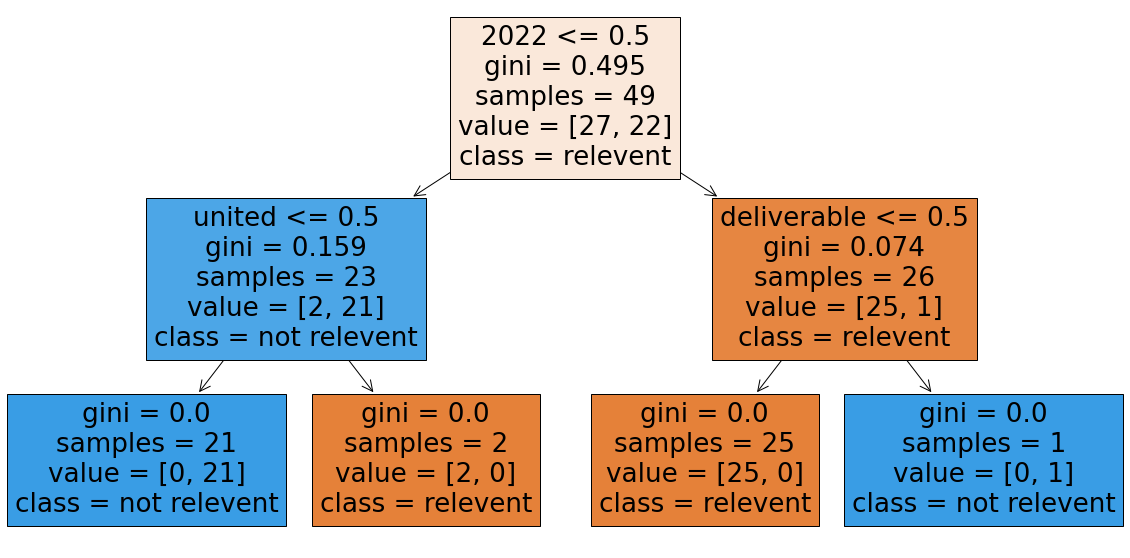

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
names = ['relevent', 'not relevent']
tree.plot_tree(tree_model,feature_names = X.columns, 
               class_names=names,
               filled = True)

https://github.com/bellabie/spacy-tf-idf/blob/master/tf-idf.py

In [157]:
emails[emails.label=='description']

,email,label,Subject,From,To,Date Sent,Date Received,Body
28,Subject: Job for you_Machine Learning Engineer...,description,Job for you_Machine Learning Engineer_Newark...,pavan.k@idctechnologies.com,assansanogo@gmail.com,"Monday, April 18, 2022 8:56:25 AM GMT-07:00","Monday, April 18, 2022 11:23:10 AM GMT-07:00","\nHi,\n\n This is Pavan from IDC Technologies...."
29,Subject: Data scientist(Fulltime)||Sunnyvale/C...,description,Data scientist(Fulltime)||Sunnyvale/CA,reshu.kumari@idctechnologies.com,assansanogo@gmail.com,"Wednesday, April 20, 2022 1:01:58 PM GMT-07:00","Wednesday, April 20, 2022 3:29:15 PM GMT-07:00",\nData scientist(Fulltime)\nSunnyvale/CA\nJD :...
30,Subject: Embedded / RDK Engineer || Philadelph...,description,"Embedded / RDK Engineer || Philadelphia, PA -...",Rahul.tyagi@tanishasystems.com,assansanogo@gmail.com,"Monday, April 18, 2022 5:44:55 AM GMT-07:00","Monday, April 18, 2022 5:53:05 AM GMT-07:00","\nHi,\n\nHope you are doing well.\nPlease find..."
31,Subject: Data Scientist\nFrom: sanjay.k@idctec...,description,Data Scientist,sanjay.k@idctechnologies.com,assansanogo@gmail.com,"Wednesday, April 20, 2022 7:51:16 AM GMT-07:00","Wednesday, April 20, 2022 8:36:10 AM GMT-07:00","\nGree ngs,\nMy name is Sanjay and I'm an IT r..."
32,Subject: Cloud Data Engineer :::: Remote\nFrom...,description,Cloud Data Engineer :::: Remote,shiv.nishad@idctechnologies.com,assansanogo@gmail.com,"Tuesday, April 19, 2022 7:13:56 AM GMT-07:00","Tuesday, April 19, 2022 7:44:53 AM GMT-07:00","\nHi,\nHope you are doing great\nThis is Shiv ..."
33,Subject: Re: Associate Clean Room Technician\n...,description,4/6 Associate Clean Room Technician,Aakash.patel@talentburst.com,assansanogo@gmail.com,"Friday, April 15, 2022 12:22:06 PM GMT-07:00","Friday, April 15, 2022 11:53:38 AM GMT-07:00","Attachments: ms_cv_2022.pdf\n\nHi,\nyou might ..."
34,Subject: AI/ML Engineer (Full Time) with our c...,description,AI/ML Engineer (Full Time) with our client (U...,vineet.panghal@idctechnologies.com,assansanogo@gmail.com,"Friday, April 15, 2022 10:53:52 AM GMT-07:00","Friday, April 15, 2022 2:10:20 PM GMT-07:00","\nHi,\n\n I came across your profile on our re..."
35,Subject: Data Scientist- AI or ML // Secaucus ...,description,Data Scientist- AI or ML // Secaucus NJ // Re...,Anuj.agarwal@tanishasystems.com,assansanogo@gmail.com,"Wednesday, April 20, 2022 2:51:35 PM GMT-07:00","Wednesday, April 20, 2022 3:06:11 PM GMT-07:00",\nHi\nHope you are doing well.\nPlease find jo...
36,Subject: Urgent opening for Jr. BI Developer(I...,description,Urgent opening for Jr. BI Developer(Immediate...,gaurav.barat@tanishasystems.com,assansanogo@gmail.com,"Tuesday, April 19, 2022 9:55:11 AM GMT-07:00","Tuesday, April 19, 2022 9:49:15 AM GMT-07:00",\nRole: Jr. BI Developer(Immediate interview)\...
37,Subject: Urgent Hiring || Applications Archite...,description,Urgent Hiring || Applications Architect / Sol...,amit.s@emonics.com,assansanogo@gmail.com,"Friday, April 15, 2022 1:57:00 PM GMT-07:00","Friday, April 15, 2022 1:51:05 PM GMT-07:00","Permanent Job/Long Term Contract\n\nHello,\n\n..."


In [158]:
emails[emails.label=='alert']

,email,label,Subject,From,To,Date Sent,Date Received,Body
0,Subject: New match: Data Engineer at Inspire\n...,alert,New match: Data Engineer at Inspire,hello@otta.com,assansanogo@gmail.com,"Monday, April 18, 2022 9:26:26 AM GMT-07:00","Monday, April 18, 2022 9:26:27 AM GMT-07:00",\nThere are new jobs matching your\npreference...
1,Subject: Eurofins USA BioPharma Services is hi...,alert,Eurofins USA BioPharma Services is hiring for...,alert@indeed.com,assansanogo@gmail.com,"Tuesday, April 19, 2022 9:39:52 PM GMT-07:00","Tuesday, April 19, 2022 9:39:53 PM GMT-07:00","engineer jobs in San Diego, CA.\n\n12 new mach..."
2,"Subject: Samsung Semiconductor, Inc. is hiring...",alert,"Samsung Semiconductor, Inc. is hiring for DSA...",alert@indeed.com,assansanogo@gmail.com,"Monday, April 18, 2022 2:35:24 AM GMT-07:00","Monday, April 18, 2022 2:35:24 AM GMT-07:00",Engineer / Scientist. 15 more machine learning...
3,Subject: Recruiting From Scratch is hiring for...,alert,Recruiting From Scratch is hiring for Data En...,alert@indeed.com,assansanogo@gmail.com,"Wednesday, April 20, 2022 6:37:13 AM GMT-07:00","Wednesday, April 20, 2022 6:37:13 AM GMT-07:00","engineer jobs in Long Beach, CA.\n\n17 new mac..."
4,Subject: Samsara is hiring for Computer Vision...,alert,Samsara is hiring for Computer Vision Enginee...,alert@indeed.com,assansanogo@gmail.com,"Friday, April 15, 2022 2:24:59 AM GMT-07:00","Friday, April 15, 2022 2:25:00 AM GMT-07:00",\n15 new computer vision engineer\njobs in Rem...
5,Subject: Experian is hiring for Machine Learni...,alert,Experian is hiring for Machine Learning Engin...,alert@indeed.com,assansanogo@gmail.com,"Saturday, April 16, 2022 1:57:36 AM GMT-07:00","Saturday, April 16, 2022 1:57:37 AM GMT-07:00","learning engineer jobs in Long Beach, CA.\n\n1..."
6,Subject: Eurofins USA BioPharma Services is hi...,alert,Eurofins USA BioPharma Services is hiring for...,alert@indeed.com,assansanogo@gmail.com,"Friday, April 15, 2022 9:41:02 AM GMT-07:00","Friday, April 15, 2022 9:41:03 AM GMT-07:00",Data Scientist jobs.\n\n11 new Pharmaceutical ...
7,Subject: zettalogix.Inc is hiring for Machine ...,alert,zettalogix.Inc is hiring for Machine Learning...,alert@indeed.com,assansanogo@gmail.com,"Wednesday, April 20, 2022 5:31:09 AM GMT-07:00","Wednesday, April 20, 2022 5:31:10 AM GMT-07:00",Remote.\n\n13 new computer vision engineer\njo...
8,Subject: Recruiting From Scratch is hiring for...,alert,Recruiting From Scratch is hiring for Data Sc...,alert@indeed.com,assansanogo@gmail.com,"Saturday, April 16, 2022 9:26:11 AM GMT-07:00","Saturday, April 16, 2022 9:26:12 AM GMT-07:00","Diego, CA.\n\n17 new data scientist jobs in Sa..."
9,Subject: SENIOR DATA SCIENTIST opening at SHOP...,alert,SENIOR DATA SCIENTIST opening at SHOPIFY,alerts@ziprecruiter.com,assansanogo@gmail.com,"Monday, April 18, 2022 1:55:25 PM GMT-07:00","Monday, April 18, 2022 1:55:26 PM GMT-07:00",\nRecommended: Download the app to find jobs o...


## Synonym words:

In [51]:
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            if word != l.name():
                synonyms.append(l.name())
    return synonyms

In [52]:
get_synonyms('essential')

['necessity',
 'requirement',
 'requisite',
 'necessary',
 'indispensable',
 'all-important',
 'all_important',
 'crucial',
 'of_the_essence',
 'substantive']

In [28]:
get_synonyms('requirement')

['demand', 'necessity', 'essential', 'requisite', 'necessary', 'prerequisite']

In [29]:
get_synonyms('prerequisite')

['requirement']

In [166]:
get_synonyms('experience')

['see', 'go_through', 'know', 'live', 'receive', 'have', 'get', 'feel', 'have']

In [ ]:
!python -m spacy download en_core_web_lg

/Users/asmaghorbel/opt/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
/Users/asmaghorbel/opt/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
     |███▋                            | 65.5MB 800kB/s eta 0:10:53     |██▍                             | 43.8MB 362kB/s eta 0:25:00

In [1]:
!python -m spacy download en_core_web_md

/Users/asmaghorbel/opt/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
/Users/asmaghorbel/opt/anaconda3/lib/python3.7/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
     |████████████████████████████████| 42.8MB 441kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
import spacy
  
nlp = spacy.load('en_core_web_md')
  
print("Enter two space-separated words")
words = input()
  
tokens = nlp(words)
  
for token in tokens:
    # Printing the following attributes of each token.
    # text: the word string, has_vector: if it contains
    # a vector representation in the model, 
    # vector_norm: the algebraic norm of the vector,
    # is_oov: if the word is out of vocabulary.
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
  
token1, token2 = tokens[0], tokens[1]
  
print("Similarity:", token1.similarity(token2))

Enter two space-separated words
requirement prerequisite
requirement True 48.473427 False
prerequisite True 47.727093 False
Similarity: 0.8419544696807861


In [ ]:
text = nlp(text)
words = [token.lemma_ for token in text if not (token.is_stop or token.is_punct or token.is_space)]

https://www.kaggle.com/code/sanabdriss/nlp-extract-skills-from-job-descriptions/notebook    
https://medium.com/@Olohireme/job-skills-extraction-from-data-science-job-posts-38fd58b94675   
